In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df = pd.read_csv("spotify_songs.csv")

In [5]:
print(df.shape)

(32833, 23)


In [8]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

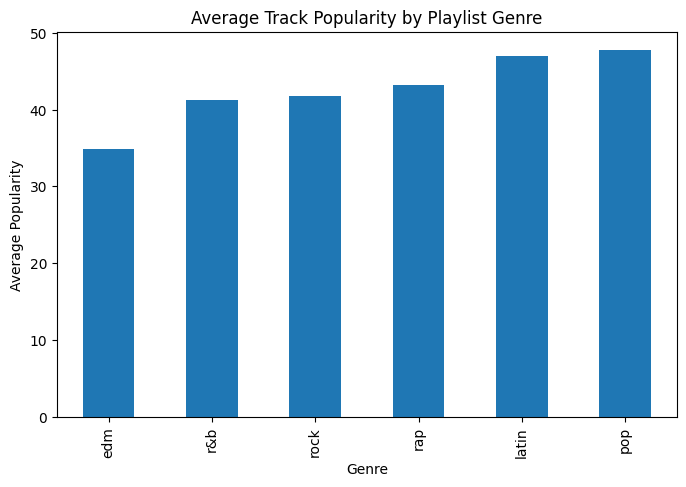

In [9]:
df.groupby('playlist_genre')['track_popularity'].mean().sort_values().plot(kind='bar', figsize=(8,5))
plt.title("Average Track Popularity by Playlist Genre")
plt.ylabel("Average Popularity")
plt.xlabel("Genre")
plt.show()


In [10]:
import plotly.express as px

# Group data by genre
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Create interactive bar chart
fig = px.bar(
    genre_popularity,
    x='playlist_genre',
    y='track_popularity',
    title="Average Track Popularity by Playlist Genre",
    labels={'track_popularity': 'Average Popularity', 'playlist_genre': 'Genre'},
    hover_data={'track_popularity': ':.2f'}  # shows 2 decimal places on hover
)

fig.show()


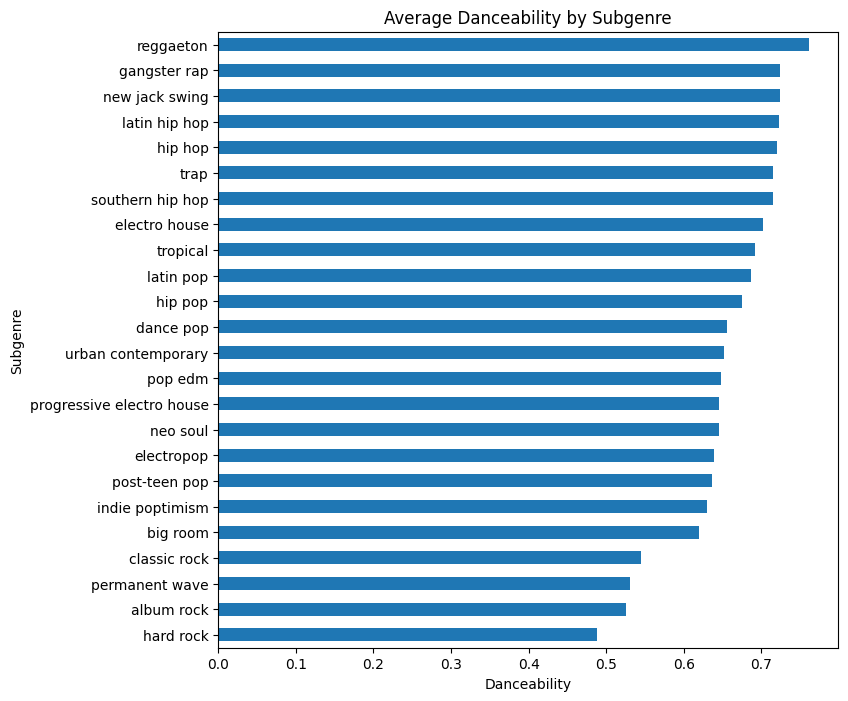

In [11]:
df.groupby('playlist_subgenre')['danceability'].mean().sort_values().plot(kind='barh', figsize=(8,8))
plt.title("Average Danceability by Subgenre")
plt.xlabel("Danceability")
plt.ylabel("Subgenre")
plt.show()


In [12]:
subgenre_danceability = df.groupby('playlist_subgenre')['danceability'].mean().reset_index()

fig = px.bar(
    subgenre_danceability,
    x='danceability',
    y='playlist_subgenre',
    orientation='h',
    title="Average Danceability by Subgenre",
    labels={'danceability': 'Average Danceability', 'playlist_subgenre': 'Subgenre'},
    hover_data={'danceability': ':.2f'}
)

fig.show()
